### Importing Required Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import plotly.express as px

In [7]:
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [8]:
df = pd.read_csv('/content/HR_comma_sep.csv')

In [9]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Checking Whether We have any Null Values in the Data

In [11]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [12]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [13]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [14]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

## Coverting Categorical Data Into Numerical Data

In [15]:
df['salary'] = df['salary'].map({"low":0,"medium":1,"high":2})

In [16]:
df['salary'].unique()

array([0, 1, 2])

In [17]:
df['salary'].value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

In [18]:
df['sales'] = df['sales'].map({"sales":0,"accounting":1,"hr":2 , "technical" :3,"support" :4,"management":5,"IT" : 6 ,
                               "product_mng" : 7,"marketing" : 8 ,"RandD":9})

In [19]:
df['sales'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
df['sales'].value_counts()

0    4140
3    2720
4    2229
6    1227
7     902
8     858
9     787
1     767
2     739
5     630
Name: sales, dtype: int64

In [21]:
df['left'].unique()

array([1, 0])

In [22]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [23]:
df['salary'].unique

<bound method Series.unique of 0        0
1        1
2        1
3        0
4        0
        ..
14994    0
14995    0
14996    0
14997    0
14998    0
Name: salary, Length: 14999, dtype: int64>

In [24]:
df['salary'].value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

In [25]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
sales,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


### Exploratory Data Analysis

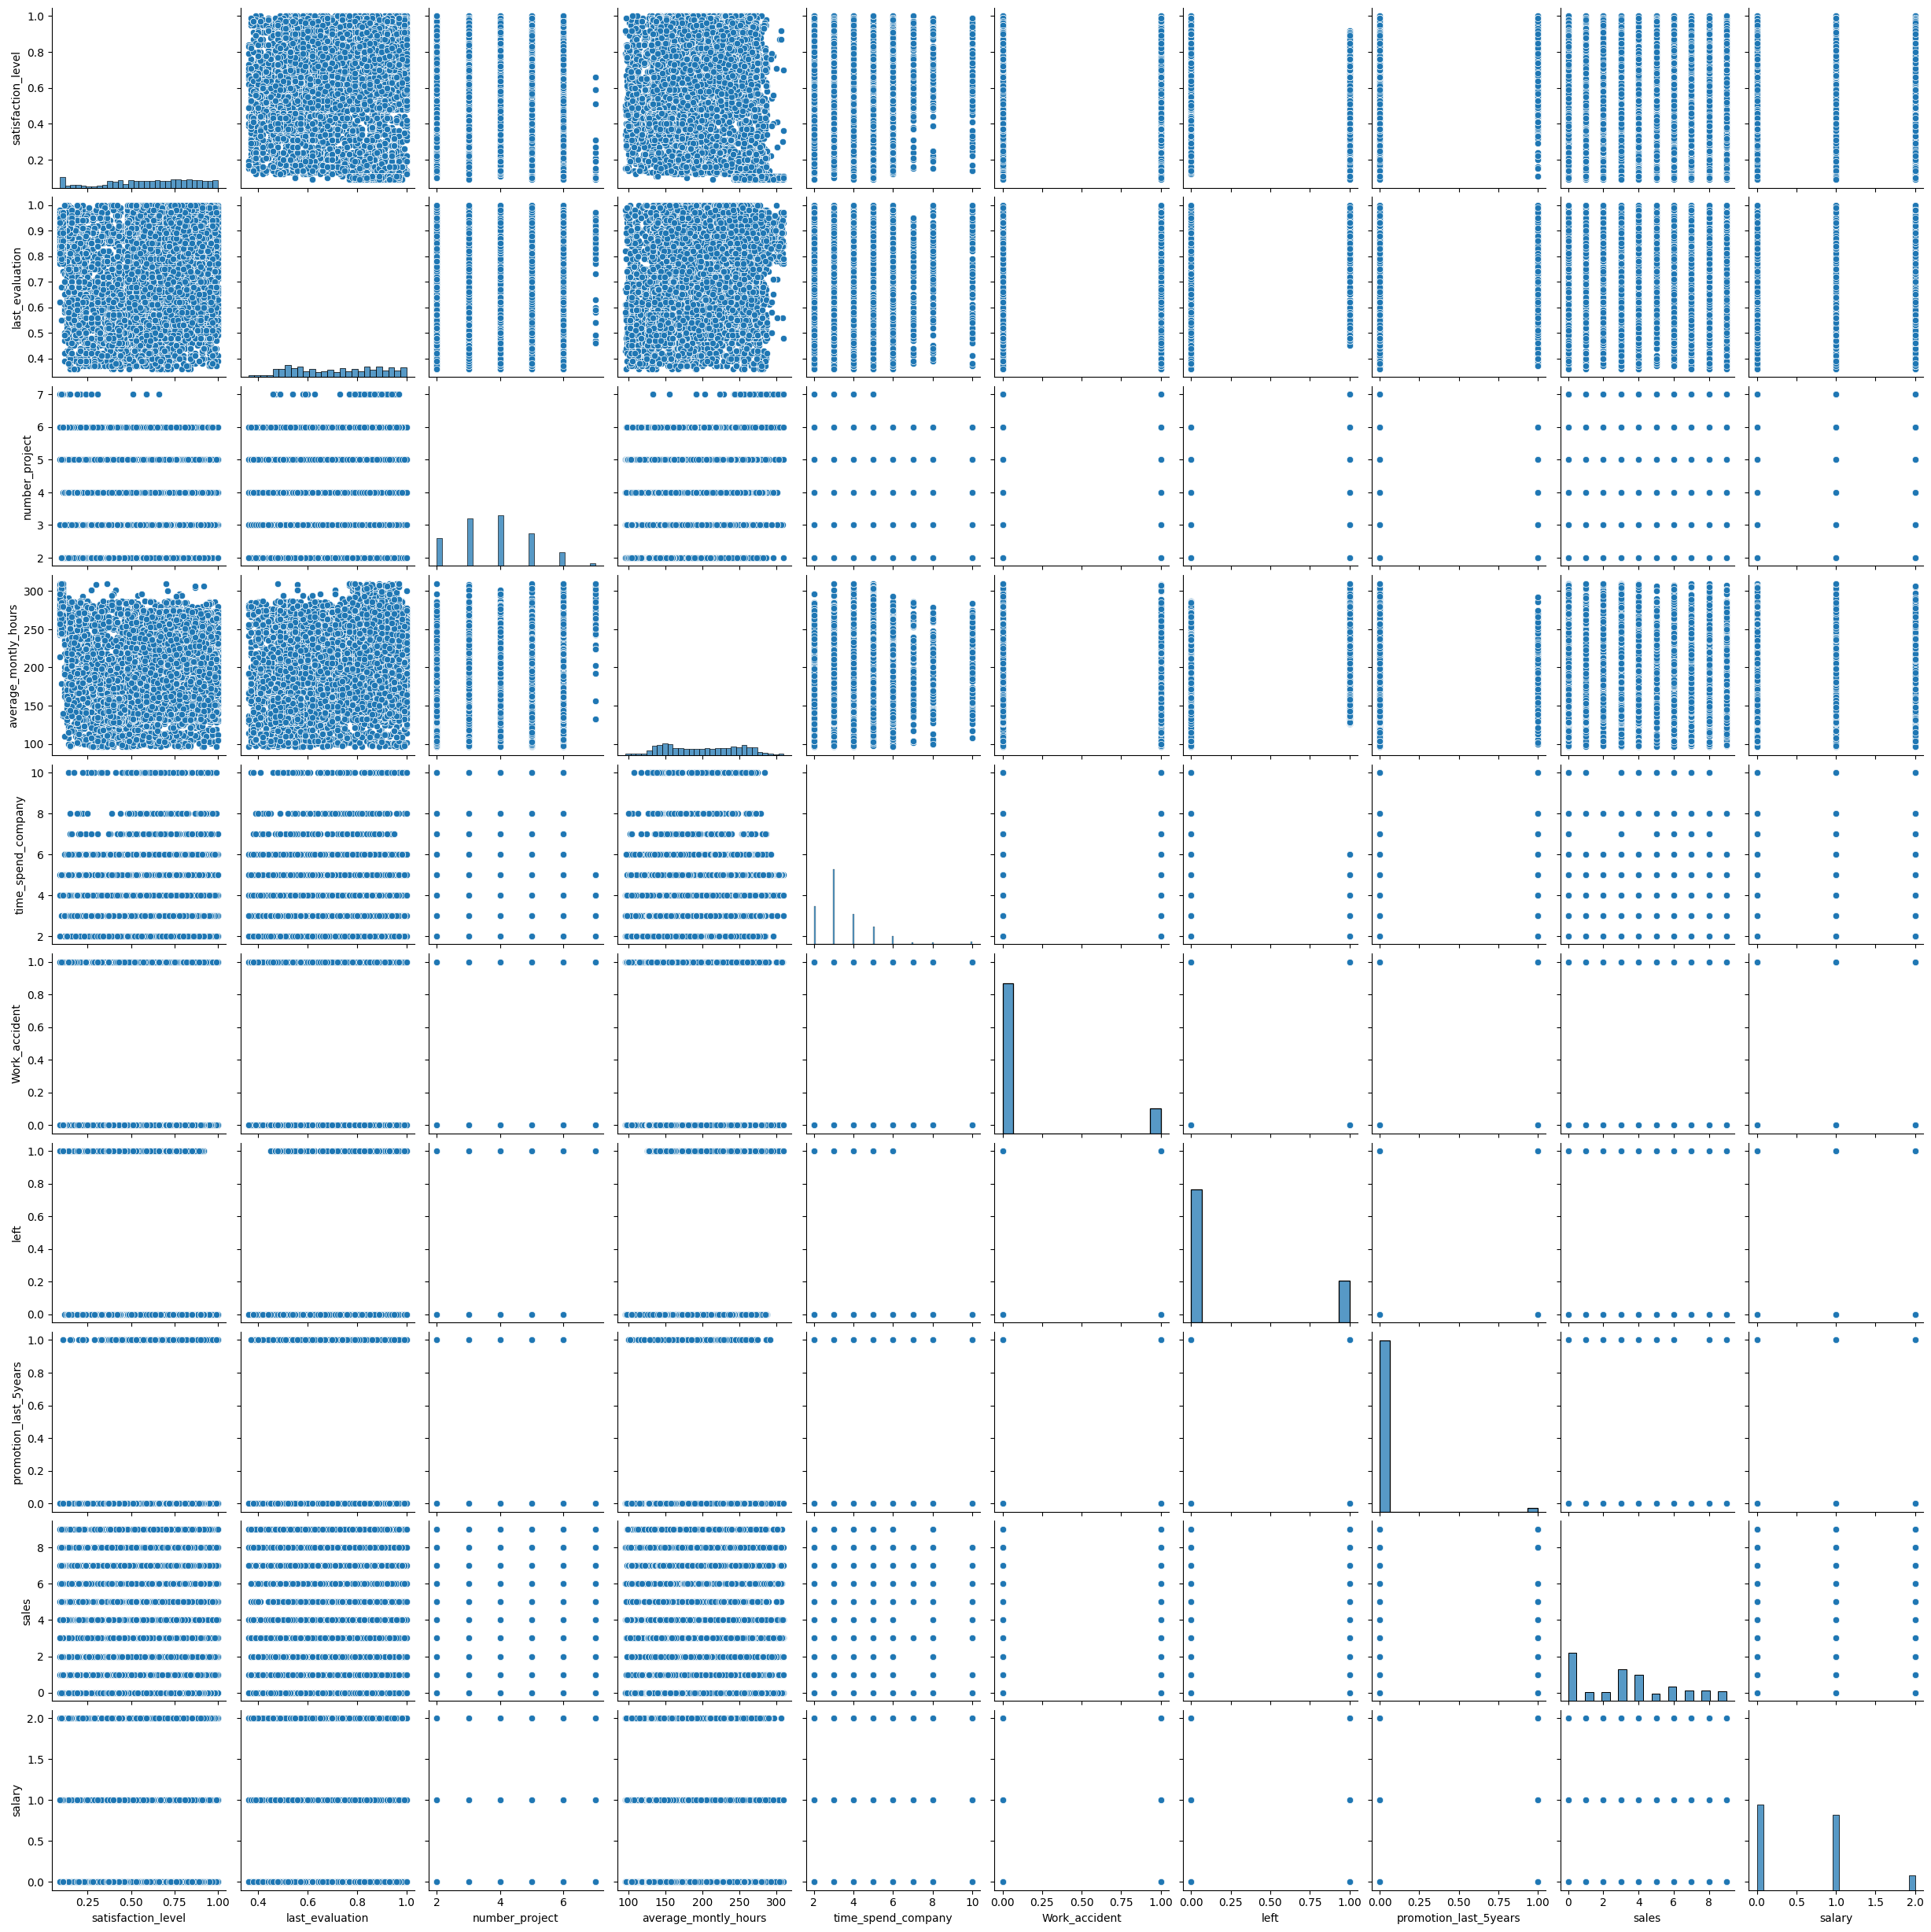

In [26]:
sns.pairplot(df)

<Axes: >

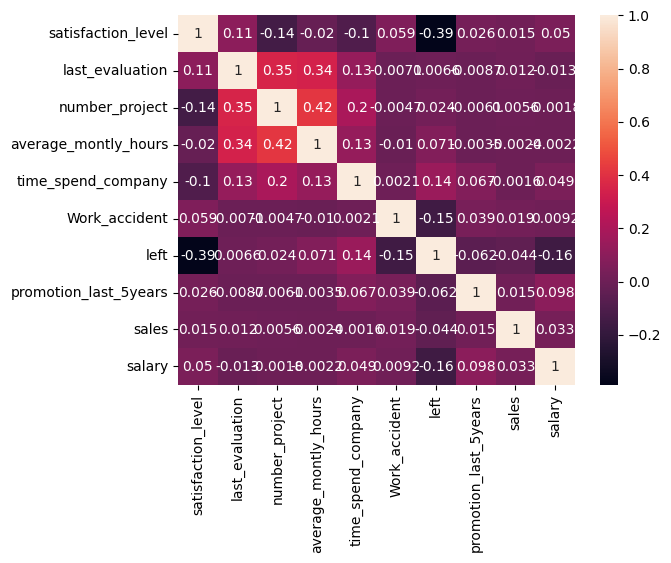

In [27]:
sns.heatmap(df.corr(),annot = True)

<Axes: title={'center': 'HR_Comma'}>

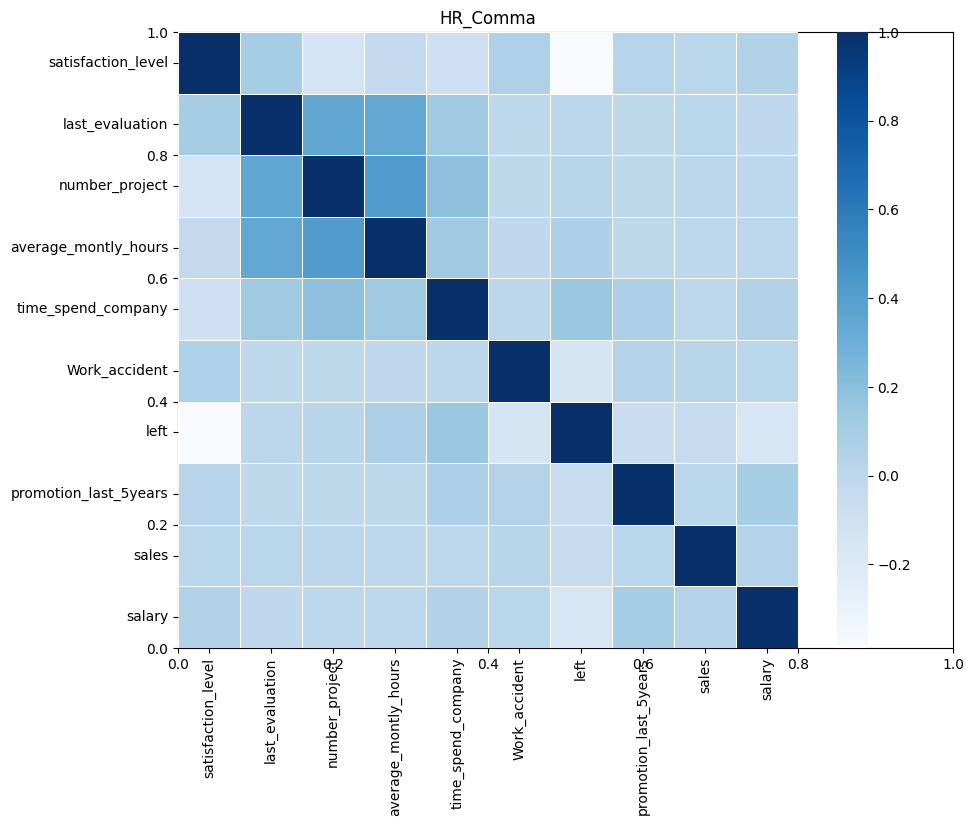

In [28]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("HR_Comma")
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [29]:
fig = px.histogram(df, x='satisfaction_level', color='left', nbins=10, width=500, height=350)
fig.show()

In [30]:
fig = px.histogram(df, x='last_evaluation', color='left', nbins=10, width=500, height=350)
fig.show()

In [31]:
fig = px.histogram(df, x='number_project', color='left', nbins=10, width=500, height=350)
fig.show()

In [32]:
fig = px.histogram(df, x='time_spend_company', color='left', nbins=10, width=500, height=350)
fig.show()

In [33]:
fig = px.histogram(df, x='Work_accident', color='left', nbins=2, width=500, height=350)
fig.show()

In [34]:
fig = px.histogram(df, x='left', nbins=2, width=500, height=350)
fig.show()

In [35]:
fig = px.histogram(df, x='promotion_last_5years', color='left', nbins=2, width=500, height=350)
fig.show()

In [36]:
fig = px.histogram(df, x='sales', color='left', nbins=10, width=500, height=350)
fig.show()

In [37]:
fig = px.histogram(df, x='salary', color='left', nbins=10, width=500, height=350)
fig.show()

In [38]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


## Separating Data For Training and Testing

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = df.drop(['left'], axis=1)
y = df['left']

## Scalling The Values

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2, shuffle=True)

### Model Building with Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logi = LogisticRegression()

In [46]:
logi

LogisticRegression()

In [47]:
logi.fit(X_train, y_train)

LogisticRegression()

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
from sklearn.metrics import classification_report

In [51]:
y_train_pred = logi.predict(X_train)

In [52]:
y_test_pred = logi.predict(X_test)

In [53]:
# Confusion Matrix For Training Data with Training Data

In [54]:
confusion_matrix(y_train ,y_train_pred)

array([[8468,  666],
       [1824, 1041]])

In [55]:
# Accuracy For Training Data With Logistic Regression

In [56]:
accuracy_score(y_train,y_train_pred)*100

79.2482706892241

In [57]:
# Classifiaction Report For Training Data Logistic Regression

In [58]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      9134
           1       0.61      0.36      0.46      2865

    accuracy                           0.79     11999
   macro avg       0.72      0.65      0.66     11999
weighted avg       0.77      0.79      0.77     11999



In [59]:
#Confusion Matrix For Testing Data With Logistic Regression

In [60]:
confusion_matrix(y_test,y_test_pred)

array([[2120,  174],
       [ 471,  235]])

In [61]:
#Accuracy For Testing Data With Logistics Regression

In [62]:
accuracy_score(y_test,y_test_pred)*100

78.5

In [63]:
#Classification Report For Testing Data With Logistic Regression

In [64]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.33      0.42       706

    accuracy                           0.79      3000
   macro avg       0.70      0.63      0.64      3000
weighted avg       0.76      0.79      0.76      3000



### Hyperparameter Tuning  For Logistic Regression

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
logi_final = LogisticRegression()

In [69]:
parameters = {

    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'tol' : [1e-1 , 1e-2 , 1e-3 , 1e-4],
    'class_weight' : ['balanced',None],
    'max_iter' : [50,100,130,150,200],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class' : ['auto', 'ovr', 'multinomial'],
    'verbose' : [0,1],
    'n_jobs' : [1,-1]

}

In [70]:
gs = GridSearchCV(estimator=logi_final ,
                 param_grid=parameters,
                 scoring='accuracy',
                 cv = 10 ,
                 n_jobs=-1)


In [ ]:
##Best Accuracy : 0.7948155407283848

In [ ]:
df

### Testing Logistic Regression

In [ ]:
logi.predict([[0.80,0.86,5,262,6,0,0,0,1]])

In [ ]:
logi.predict([[0.72,0.87,5,223,5,0,0,0,0]])

In [ ]:
logi.predict([[0.38,0.53,2,157,3,0,0,0,0]])

In [ ]:
logi.predict([[0.11,0.88,7,272,4,0,0,0,1]])

In [ ]:
logi.predict([[0.40,0.57,2,151,3,0,0,4,0]])

In [ ]:
## Giving Data Points Randomly for Checking Model

In [ ]:
logi.predict([[0.23,0.28,3,121,2,0,0,2,0]])

## Model Building With Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
ran = RandomForestClassifier(criterion = 'entropy', random_state = 0)

In [75]:
ran

RandomForestClassifier(criterion='entropy', random_state=0)

In [76]:
ran.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [77]:
y_train_pred = ran.predict(X_train)

In [78]:
y_test_pred = ran.predict(X_test)

In [79]:
#Confusion Matrix For Training Data With Random Forest Classifier

In [ ]:
confusion_matrix(y_train , y_train_pred)

In [82]:
#Accuracy For Training Data With Random Forest Classifier

In [81]:
accuracy_score(y_train,y_train_pred)*100

99.99166597216434

In [80]:
#Classifiacation Report For Training Data With Random Forest Classifier

In [83]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9134
           1       1.00      1.00      1.00      2865

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



In [84]:
#Confusion Matrix For Testing Data With Random Forest Classifier

In [85]:
confusion_matrix(y_test, y_test_pred)

array([[2286,    8],
       [  27,  679]])

In [86]:
#Accuracy For Testing Data With Random Forest Classifier

In [87]:
accuracy_score(y_test,y_test_pred)*100

98.83333333333333

In [88]:
#Classifiaction Report For Testing Data Random Forest Classifier

In [89]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



## Model Building With Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
deci = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [92]:
deci.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [93]:
y_train_pred = deci.predict(X_train)

In [94]:
y_test_pred = deci.predict(X_test)

In [95]:
#Confusion Matrix For Training Data With Decision Tree

In [96]:
confusion_matrix(y_train , y_train_pred)

array([[9134,    0],
       [   0, 2865]])

In [97]:
#Accuracy For Trainig Data with Decision Tree

In [98]:
accuracy_score(y_train,y_train_pred)*100

100.0

In [99]:
#Classification Report For Trainig Data with Decision Tree

In [100]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9134
           1       1.00      1.00      1.00      2865

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



In [101]:
#Confusion Matrix For Testing Data With Decision Tree

In [102]:
confusion_matrix(y_test, y_test_pred)

array([[2240,   54],
       [  26,  680]])

In [103]:
#Accuracy For Testing Data With Decision Tree

In [104]:
accuracy_score(y_test,y_test_pred)*100

97.33333333333334

In [105]:
#Classification Report For Testing Data with Decision Tree

In [106]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2294
           1       0.93      0.96      0.94       706

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000



## Model Building with Support Vector Machine

In [107]:
from sklearn.svm import SVC

In [108]:
svm = SVC(kernel = 'linear', random_state = 0)

In [109]:
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [110]:
y_train_pred = deci.predict(X_train)

In [111]:
y_test_pred = deci.predict(X_test)

In [112]:
#Confusion Trainig Data With Support Vector Machine

In [113]:
confusion_matrix(y_train , y_train_pred)

array([[9134,    0],
       [   0, 2865]])

In [114]:
#Accuracy For Trainig Data With Support Vector Machine

In [115]:
accuracy_score(y_train,y_train_pred)*100

100.0

In [116]:
#Classification Report For Support Vector Machine

In [117]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9134
           1       1.00      1.00      1.00      2865

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



In [118]:
#Confusion For Testing Data With Support Vector Machine

In [119]:
confusion_matrix(y_test, y_test_pred)

array([[2240,   54],
       [  26,  680]])

In [120]:
#Accuracy For Testing Data With Support Vector Machine

In [123]:
accuracy_score(y_test,y_test_pred)*100

97.33333333333334

In [121]:
#Classification For Testing Data With Support Vector Machine

In [122]:
print(classification_report(y_test , y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2294
           1       0.93      0.96      0.94       706

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000



## Saving The Model

In [127]:
import pickle
pickle.dump(logi,open('logi.pkl','wb'))

In [125]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')